**Оглавление:**
1. [Изучение данных](#step1)  
2. [Анализ данных](#step2) 
3. [Общий вывод](#step3)


<a id="step1"></a>
## Изучение данных 

Для начала имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests

Прочитаем файл с данными:

In [2]:
df = pd.read_csv('datasets/rest_data.csv')

Рассмотрим наш датасет:

In [3]:
display(df.head(10), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


None

Таблица состоит из 15366 строк и 6 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object.

Рассмотрим подробней столбцы с числовыми данными:

In [4]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Видим, что в среднем в заведениях порядка 60 посадочных мест. Минимальное количество посадочниых мест - ноль. Вероятно, в таблице содержатся данные о заведениях, которые работают исключительно навынос. Проверим, так ли это:

In [5]:
df.query('number == 0')

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,211221,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Действительно, видим, что это ларьки с продажей готовой еды, кулинарии и т.п. Таких заведений в нашей таблице 1621.

Проверим, нет ли в нашей таблице дубликатов:

In [6]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

**Вывод**

В нашем распоряжении таблица, в которой содержатся данные о наименованиях заведений общественного питания в Москве, их принадлежности к сетям, типе объекта, адресе и количестве посадочных мест. 

В таблице нет пропусков, тип данных в каждой колонке соотвествует содержанию, дубликаты в таблице отсутствуют.

<a id="step2"></a>
## Анализ данных

### Соотношение видов объектов общественного питания по количеству

Рассмотрим, как соотносятся между собой виды объектов общественного питания по количеству. Составим таблицу и построим столбчатый график:

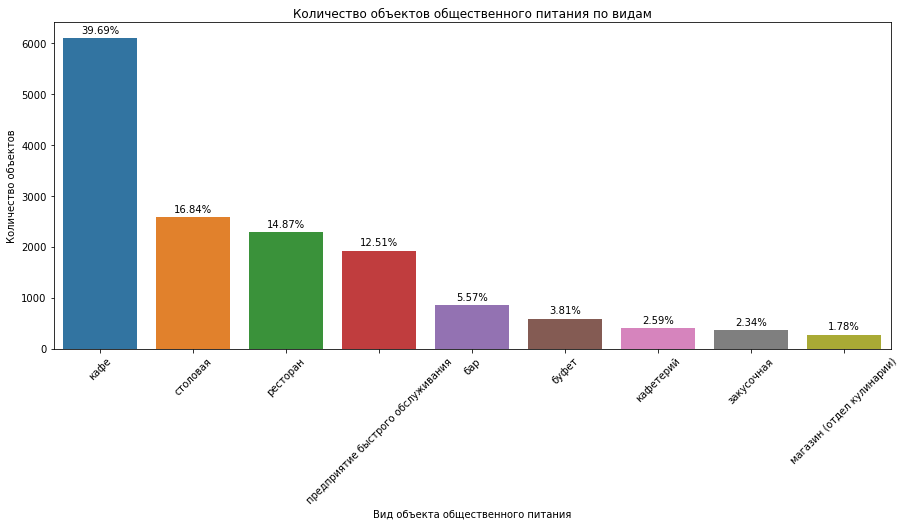

,object_type,qty,percentage
0,кафе,6099,39.69%
1,столовая,2587,16.84%
2,ресторан,2285,14.87%
3,предприятие быстрого обслуживания,1923,12.51%
4,бар,856,5.57%
5,буфет,585,3.81%
6,кафетерий,398,2.59%
7,закусочная,360,2.34%
8,магазин (отдел кулинарии),273,1.78%


In [7]:
type_rest = (df.pivot_table(index='object_type', values='id', aggfunc='count')
             .sort_values(by='id', ascending=False).reset_index()
             .rename(columns={'id':'qty'})
            )
type_rest['percentage'] = (type_rest['qty']/type_rest['qty'].sum()).apply(lambda x: format(x, '.2%'))

plt.figure(figsize=(15, 6))

sns.barplot(x='object_type', y='qty', data=type_rest)

for i in range(len(type_rest['object_type'])):
    plt.text(
        x=i, 
        y=type_rest['qty'][i]+100, 
        s=type_rest['percentage'][i], 
        ha = 'center',
        size = 10
    )

plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество объектов')
plt.title('Количество объектов общественного питания по видам')
plt.show()

type_rest

Видим, что практически 40% от всех заведений составляют кафе. Далее примерно на одном уровне по количеству идут столовые, рестораны и предприятия быстрого питания (далее - ПБО).

### Соотношение сетевых и несетевых заведений по количеству

Рассмотрим соотношение сетевых и несетевых заведений по количеству. Составим таблицу и построим столбчатый график:

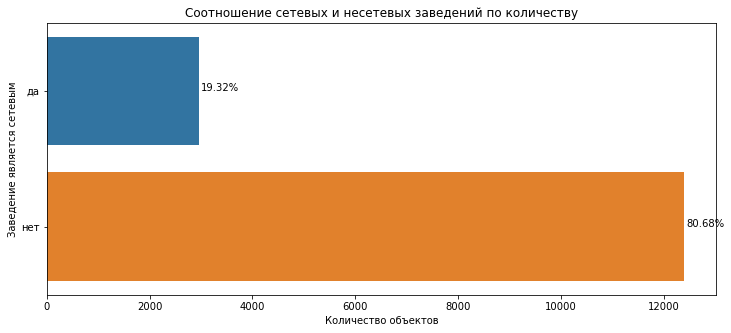

,chain,qty,percentage
0,да,2968,19.32%
1,нет,12398,80.68%


In [8]:
chain_rest = df.pivot_table(index='chain', values='id', aggfunc='count').reset_index().rename(columns={'id':'qty'})
chain_rest['percentage'] = (chain_rest['qty']/chain_rest['qty'].sum()).apply(lambda x: format(x, '.2%'))

plt.figure(figsize=(12, 5))
sns.barplot(x='qty', y='chain', data=chain_rest)

for i in range(len(chain_rest['chain'])):
    plt.text(
        x=chain_rest['qty'][i]+400, 
        y=i, 
        s=chain_rest['percentage'][i], 
        ha = 'center',
        size = 10
    )

plt.xlabel('Количество объектов')
plt.ylabel('Заведение является сетевым')
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.show()

chain_rest

Видим, что преобладают несетевые заведения. Несетевых заведений порядка 80% против 20% сетевых заведений.

### Для какого вида объекта общественного питания характерно сетевое распространение?

Посмотрим, как соотносятся между собой сетевые и несетевые заведения по видам:

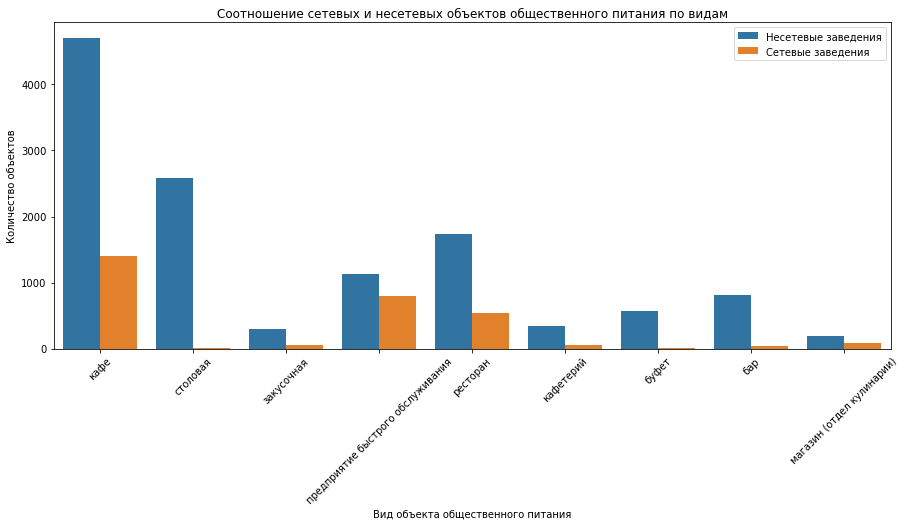

In [9]:
plt.figure(figsize=(15, 6))

sns.countplot(x='object_type', hue='chain', data=df)
      
plt.legend(['Несетевые заведения', 'Сетевые заведения'])

plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество объектов')
plt.title('Соотношение сетевых и несетевых объектов общественного питания по видам')
plt.show();

Видим, что сетевой характер имеют в основном кафе, ПБО и рестораны. Также видим, что среди отделов кулинарии сетевые заведения составляют значительную часть.  

Далее рассмотрим, как соотносятся между собой сетевые заведения по видам. Составим таблицу и построим столбчатую диаграмму:

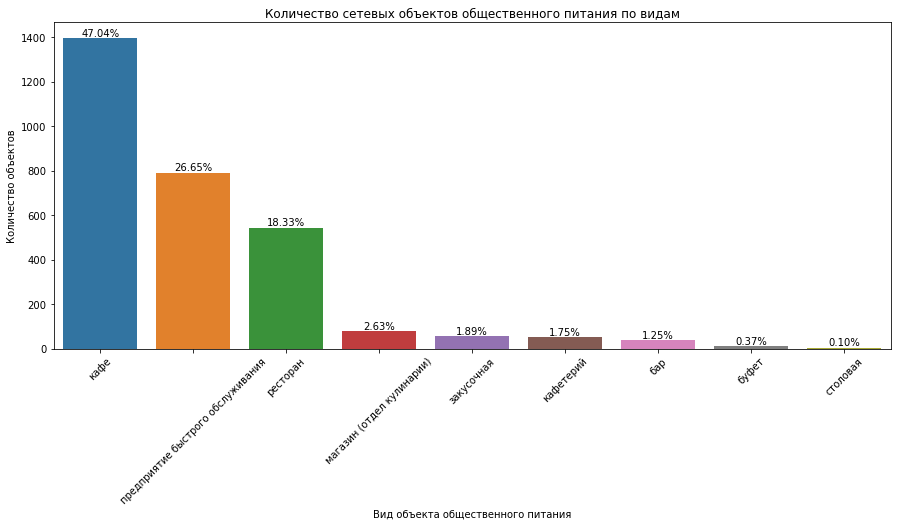

,object_type,total,is_chain,percentage,is_chain_percentage
0,кафе,6099,1396,22.89%,47.04%
1,предприятие быстрого обслуживания,1923,791,41.13%,26.65%
2,ресторан,2285,544,23.81%,18.33%
3,магазин (отдел кулинарии),273,78,28.57%,2.63%
4,закусочная,360,56,15.56%,1.89%
5,кафетерий,398,52,13.07%,1.75%
6,бар,856,37,4.32%,1.25%
7,буфет,585,11,1.88%,0.37%
8,столовая,2587,3,0.12%,0.10%


In [10]:
is_chain = df.groupby('object_type').agg({'id':'count'})
is_chain['is_chain'] = df.query('chain == "да"').groupby('object_type').agg({'id':'count'})
is_chain = is_chain.rename(columns={'id':'total'})
is_chain['percentage'] = (is_chain['is_chain'] / is_chain['total']).apply(lambda x: format(x, '.2%'))
is_chain['is_chain_percentage'] = (is_chain['is_chain'] / is_chain['is_chain'].sum()).apply(lambda x: format(x, '.2%'))
is_chain = is_chain.sort_values(by='is_chain', ascending=False).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='object_type', y='is_chain', data=is_chain)

for i in range(len(is_chain['object_type'])):
    plt.text(
        x=i, 
        y=is_chain['is_chain'][i]+10, 
        s=is_chain['is_chain_percentage'][i], 
        ha = 'center',
        size = 10
    )

plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество объектов')
plt.title('Количество сетевых объектов общественного питания по видам')
plt.show()

is_chain

Из графика видим, что среди сетевых заведений наибольшую долю (47%) составляют кафе, далее идут ПБО (27%) и рестораны (18%). Доля остальных видов достаточно мала.

Также, исходя из таблицы видим, что среди всех заведений сетевые объекты для типа ПБО составляют 41%, кулинарий - 29%, ресторанов - 24%, кафе - 23%.

Т.е. количество кафе в принципе достаточно большое и за счет этого они составляют значительную долю от всех сетевых заведений. Но при этом сетевой характер скорее присущ ПБО и отделам кулинарии в магазинах, а среди ресторанов и кафе он менее популярен, но все равно распространён. 

### Что характерно для сетевых заведений?

Исследуем подробней сетевые заведения на количество посадочных мест.

Рассмотрим средние значения для количества посадочных мест по типам сетевых заведений. Составим таблицу и построим столбчатый график:

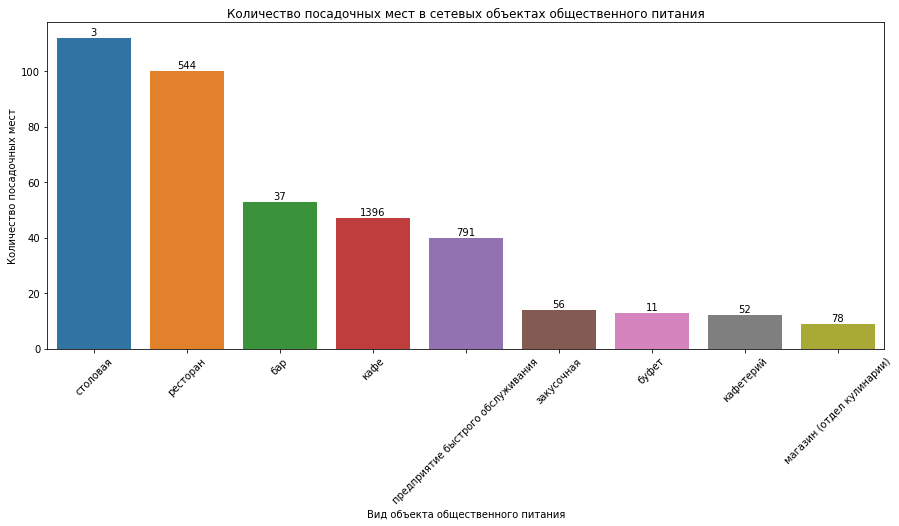

,object_type,qty,sitting_place_mean
0,столовая,3,112.0
1,ресторан,544,100.0
2,бар,37,53.0
3,кафе,1396,47.0
4,предприятие быстрого обслуживания,791,40.0
5,закусочная,56,14.0
6,буфет,11,13.0
7,кафетерий,52,12.0
8,магазин (отдел кулинарии),78,9.0


In [11]:
sitting_place = df.query('chain == "да"')
sitting_place_mean = round(sitting_place.groupby('object_type')
                      .agg({'id':'count', 'number':'mean'})
                      .sort_values(by='number', ascending=False)
                      .reset_index()
                      .rename(columns={'id':'qty', 'number':'sitting_place_mean'})
                     )

plt.figure(figsize=(15, 6))
sns.barplot(x='object_type', y='sitting_place_mean', data=sitting_place_mean)

for i in range(len(sitting_place_mean['object_type'])):
    plt.text(
        x=i, 
        y=sitting_place_mean['sitting_place_mean'][i]+1, 
        s=sitting_place_mean['qty'][i], 
        ha = 'center',
        size = 10
    )

plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест в сетевых объектах общественного питания')
plt.show()

sitting_place_mean

Для сетевых баров, кафе и ПБО среднее количество посадочных мест составляет порядка 40-50 шт. В ресторанах в среднем порядка 100 посадочным мест, что можно объяснить большим наплывом посетителей с пяницы по воскресенье, а также достаточно частым наличием в ресторанах банкетных залов для проведения различных мероприятий.

Также видим, что в нашей таблице есть 3 сетевые столовые со средним количеством посадочных мест 112 шт.

Построим диаграмму размаха с количеством посадочных мест для различных типов сетевых объектов (исключим выбросы с количеством посадочных мест более 300, чтобы лучше рассмотреть данные):

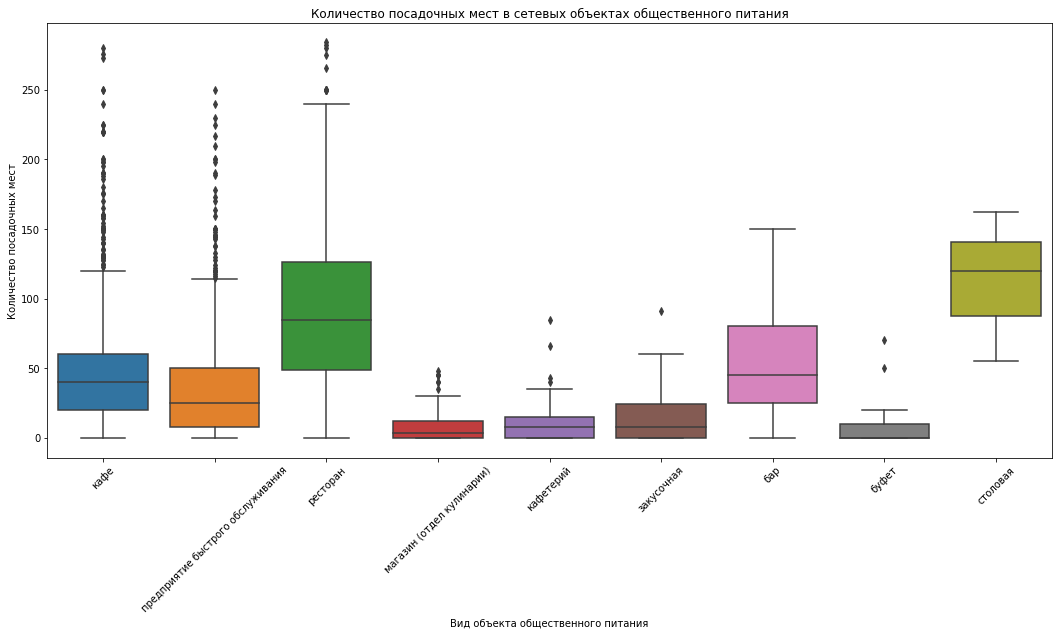

In [12]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=sitting_place[sitting_place['number'] < 300], x='object_type', y='number')
plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест в сетевых объектах общественного питания')
plt.show();

Наглядно видим, как среди прочих выделяются по количеству посадочных мест сетевые рестораны (медиана порядка 85 мест, верхняя граница в районе 240), а также видим, что кафе, ПБО и бары имеют схожые показатели. На диаграмме хорошо видно, как значительно выгядят сетевые столовые, хотя из таблицы выше мы знаем, что такую картину дают нам только 3 объекта.

В общем, можно сказать, что для сетевых заведений скорее характерно много заведений с небольшим числом посадочных мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест

Теперь рассмотрим, как распределено количество посадочных мест по объектам общественного питания в целом.

Рассмотрим средние значения для количества посадочных мест по типам заведений. Составим таблицу и построим столбчатый график:

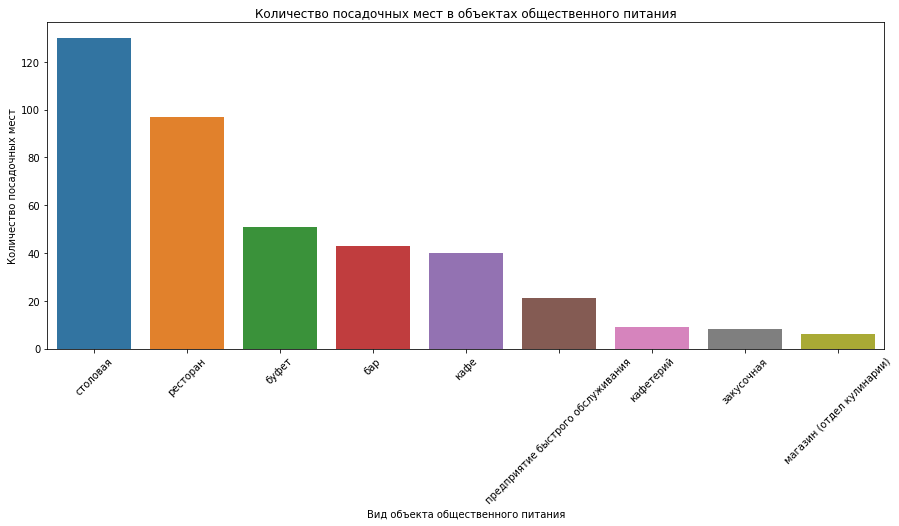

,object_type,qty,sitting_place_mean
0,столовая,2587,130.0
1,ресторан,2285,97.0
2,буфет,585,51.0
3,бар,856,43.0
4,кафе,6099,40.0
5,предприятие быстрого обслуживания,1923,21.0
6,кафетерий,398,9.0
7,закусочная,360,8.0
8,магазин (отдел кулинарии),273,6.0


In [13]:
number_of_seats = round(df.groupby('object_type')
                      .agg({'id':'count', 'number':'mean'})
                      .sort_values(by='number', ascending=False)
                      .reset_index()
                      .rename(columns={'id':'qty', 'number':'sitting_place_mean'})
                     )

plt.figure(figsize=(15, 6))
sns.barplot(x='object_type', y='sitting_place_mean', data=number_of_seats)
plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест в объектах общественного питания')
plt.show()

number_of_seats

Видим схожую с сетевыми заведениями картину: для столовых среднее количество посадочных мест составляет 130 шт., для ресторанов - 97 шт. Это можно объяснить болшим количеством людей, посещающих подобные места в определенное время. В кафе, барах, а также буфетах в среднем порядка 40-50 мест. У ПБО в общем мест стало меньше, чем у сетевых ПБО - 21 шт.

Построим диаграмму размаха с количеством посадочных мест для различных типов объектов (исключим выбросы с количеством посадочных мест более 500, чтобы лучше рассмотреть данные):

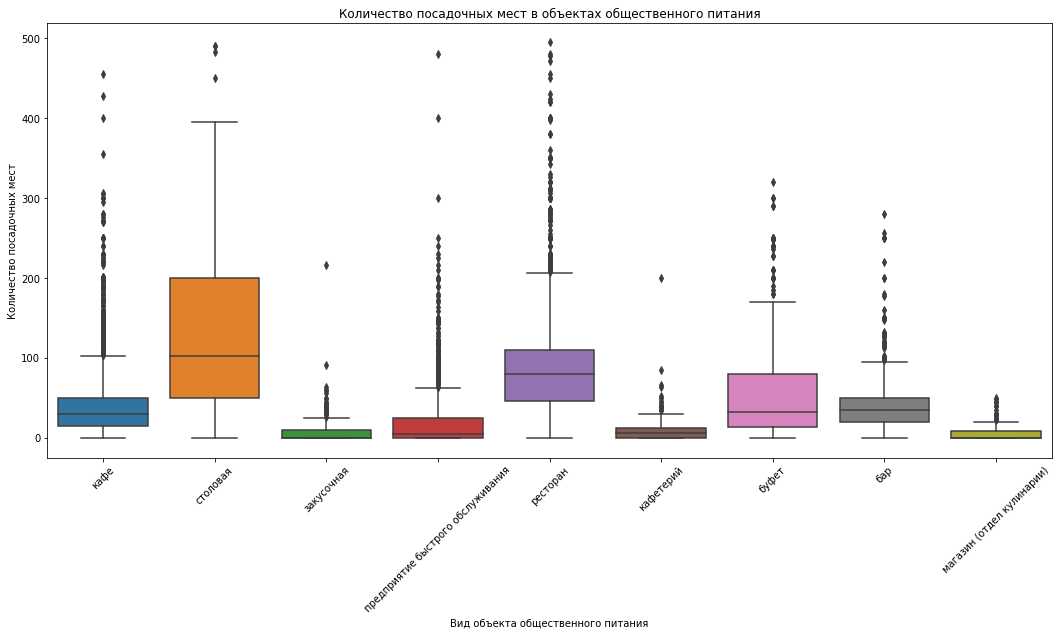

In [14]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[df['number'] < 500], x='object_type', y='number')
plt.xticks(rotation=45)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест в объектах общественного питания')
plt.show();

Видно, что среди прочих явно выделяются столовые с медианным значением около 100 мест и граничным значением около 400 мест. За ними идут рестораны с медианой около 80 мест и граничным значением порядка 200 мест. Также стоит выделить буфеты, которых мы не видели так явно на графике с сетевыми заведениями (медиана - 30 мест, граничное значение - 180 мест).

### Столбец street c информацией об улице, на которой находится заведение

Напишем функцию, чтобы выделить в отдельный столбец название улицы, на которой находится заведение:

In [15]:
def extract_street(address):
    street_name = ['улица',
                   'бульвар',
                   'шоссе',
                   'переулок',
                   'проезд',
                   'проспект',
                   'набережная',
                   'линия',
                   'тупик',
                   'километр',
                   'аллея',
                   'площадь'
                  ]
    for street in address:
        for name in street_name:
            if name in street:
                return street
            
df['street'] = df['address'].str.split(', ').apply(extract_street)
df

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Проверим, как заполнилась наша таблица и есть ли в столбце `street` пропуски:

In [16]:
df[df['street'].isna()]

,id,object_name,chain,object_type,address,number,street
394,150654,Love,нет,кафе,"город Москва, 2-й квартал Капотня, дом 1",40,None
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
...,...,...,...,...,...,...,...
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,None
15097,209001,Бургер Кинг Burger King,да,кафе,"город Москва, квартал Волжский Бульвар 113а, к...",75,None
15137,209920,Дюшес,да,ресторан,"город Москва, город Зеленоград, Проезд № 4806,...",100,None
15184,220587,Пицца Паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,None


Видим, что у нас есть 364 пропуска, в адресах которых улица явно не обозначена. В основном это пригороды Москвы. Оставим эти пропуски незаполненными. 

###  Топ-10 улиц по количеству объектов общественного питания

Выделим среди наших данных 10 улиц с наибольшим количеством заведений:

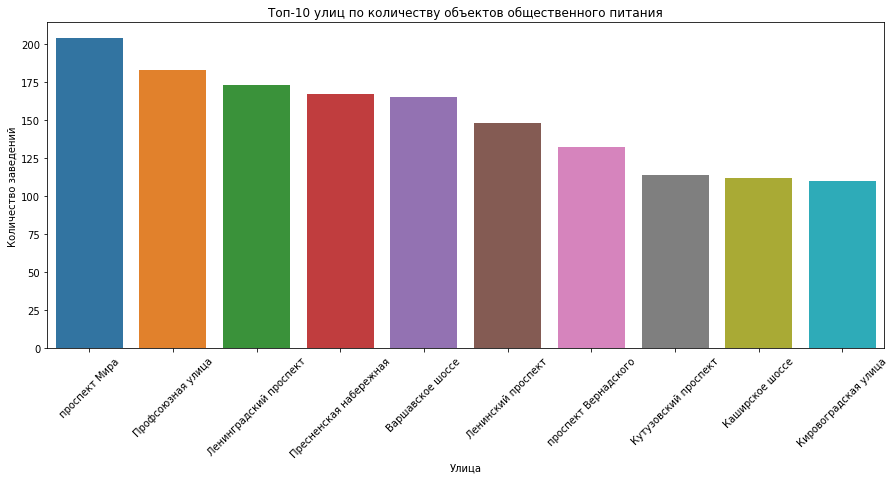

,street,object_qty
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [17]:
top_streets = (df.groupby('street')
          .agg({'chain':'count'})
          .sort_values(by='chain', ascending=False)
          .rename(columns={'chain':'object_qty'})
          .reset_index()
         )
top_10_streets = top_streets.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='street', y='object_qty', data=top_10_streets)
plt.xticks(rotation=45)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

top_10_streets

Больше всего заведений расположено на проспекте Мира - 204. На остальных улицах расположены от 110 до 180 заведений.

Воспользуемся внешней информацией чтобы узнать, в каких районах Москвы расположены эти улицы. Прочитаем таблицу `mosgaz-streets.csv`:

In [18]:
spreadsheet_id = '1XjkeiRHKVBpv8n9V9aVZFrRSCqp4uNyQS4AGhC1lLu8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

streets = pd.read_csv(BytesIO(r.content))
streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Объединим её с нашей таблицей топ-10 улиц:

In [19]:
top_districts = pd.merge(top_10_streets, streets, how='left', left_on='street', right_on='streetname')
top_districts = top_districts[['street','okrug', 'area','object_qty']]
top_districts

,street,okrug,area,object_qty
0,проспект Мира,СВАО,Алексеевский район,204
1,проспект Мира,СВАО,Ярославский Район,204
2,проспект Мира,СВАО,Район Марьина роща,204
3,проспект Мира,СВАО,Останкинский район,204
4,проспект Мира,СВАО,Район Ростокино,204
5,проспект Мира,СВАО,Район Свиблово,204
6,проспект Мира,ЦАО,Мещанский район,204
7,Профсоюзная улица,ЮЗАО,Академический район,183
8,Профсоюзная улица,ЮЗАО,Район Черемушки,183
9,Профсоюзная улица,ЮЗАО,Район Ясенево,183


Поскольку выделенные нами улицы достаточно протяженные, каждая их них пролегает через различные районы Москвы. Составим список этих районов и посмотрим их количество:

In [20]:
print(top_districts['area'].sort_values().unique())
print('Всего районов:', len(top_districts['area'].sort_values().unique()))

['Академический район' 'Алексеевский район' 'Донской район'
 'Ломоносовский район' 'Мещанский район' 'Нагорный район'
 'Обручевский район' 'Останкинский район' 'Пресненский район'
 'Район Аэропорт' 'Район Беговой' 'Район Гагаринский' 'Район Дорогомилово'
 'Район Коньково' 'Район Марьина роща' 'Район Москворечье-Сабурово'
 'Район Нагатино-Садовники' 'Район Орехово-Борисово Северное'
 'Район Орехово-Борисово Южное' 'Район Проспект Вернадского'
 'Район Раменки' 'Район Ростокино' 'Район Свиблово'
 'Район Северное Бутово' 'Район Сокол' 'Район Теплый Стан'
 'Район Тропарево-Никулино' 'Район Фили-Давыдково' 'Район Черемушки'
 'Район Чертаново Северное' 'Район Чертаново Центральное'
 'Район Чертаново Южное' 'Район Южное Бутово' 'Район Якиманка'
 'Район Ясенево' 'Хорошевский район' 'Ярославский Район']
Всего районов: 37


Составим сводную таблицу по улицам, количеством округов и районов, в которых они расположены, и с количеством заведений, которые находятся на этих улицах:

In [21]:
top_10 = (top_districts.groupby('street')
          .agg({'okrug':'nunique', 'area':'nunique', 'object_qty':'first'})
          .sort_values(by='object_qty', ascending=False)
         )
top_10

,okrug,area,object_qty
street,,,
проспект Мира,2,7,204
Профсоюзная улица,1,6,183
Ленинградский проспект,1,4,173
Пресненская набережная,1,1,167
Варшавское шоссе,2,8,165
Ленинский проспект,4,8,148
проспект Вернадского,2,5,132
Кутузовский проспект,1,2,114
Каширское шоссе,1,4,112


В среднем, каждая улица расположена в 1-2 округах и 4-5 районах Москвы. На общем фоне выделяется только Пресненская набережная, расположенная только в Пресненском районе.

### Число улиц с одним объектом общественного питания 

Выделим улицы с одним объектом общественного питания и объединим полученную таблицу с загруженной ранее таблицей районов Москвы:

In [22]:
one_object_street = top_streets.query('object_qty == 1')
one_object_district = pd.merge(one_object_street, streets, how='left', left_on='street', right_on='streetname')
one_object_district

,street,object_qty,streetname,areaid,okrug,area
0,Красноказарменный проезд,1,Красноказарменный проезд,114.0,ЮВАО,Район Лефортово
1,2-й Щемиловский переулок,1,2-й Щемиловский переулок,19.0,ЦАО,Тверской район
2,шоссе Фрезер,1,шоссе Фрезер,117.0,ЮВАО,Нижегородский район
3,1-й Кожуховский проезд,1,1-й Кожуховский проезд,98.0,ЮАО,Даниловский район
4,2-й Полевой переулок,1,2-й Полевой переулок,26.0,ВАО,Район Сокольники
...,...,...,...,...,...,...
604,Мерзляковский переулок,1,Мерзляковский переулок,17.0,ЦАО,Пресненский район
605,Мерзляковский переулок,1,Мерзляковский переулок,12.0,ЦАО,Район Арбат
606,Якиманский переулок,1,Якиманский переулок,21.0,ЦАО,Район Якиманка
607,Ялтинская улица,1,Ялтинская улица,104.0,ЮАО,Нагорный район


Составим список районов, в которых расположены эти улицы, и посмотрим их количество:

In [23]:
print(one_object_district['area'].sort_values().unique())
print('Всего районов:', len(one_object_district['area'].sort_values().unique()))

['Алексеевский район' 'Алтуфьевский район' 'Бабушкинский район'
 'Басманный район' 'Бескудниковский Район' 'Бутырский район'
 'Войковский Район' 'Головинский район' 'Даниловский район'
 'Дмитровский район' 'Донской район' 'Красносельский район'
 'Лосиноостровский район' 'Мещанский район' 'Можайский Район'
 'Молжаниновский район' 'Нагорный район' 'Нижегородский район'
 'Обручевский район' 'Останкинский район' 'Панфиловский район'
 'Пресненский район' 'Район Арбат' 'Район Аэропорт' 'Район Беговой'
 'Район Бирюлево Восточное' 'Район Богородское' 'Район Внуково'
 'Район Восточное Измайлово' 'Район Восточный' 'Район Выхино-Жулебино'
 'Район Гагаринский' 'Район Гольяново' 'Район Дорогомилово'
 'Район Замоскворечье' 'Район Западное Дегунино' 'Район Зюзино'
 'Район Ивановское' 'Район Измайлово' 'Район Коньково' 'Район Коптево'
 'Район Косино-Ухтомский' 'Район Котловка' 'Район Крюково'
 'Район Кузьминки' 'Район Кунцево' 'Район Куркино' 'Район Левобережный'
 'Район Лефортово' 'Район Лианозово' '

Судя по названиям, в основном это пригороды и спальные районы Москвы.

Посмотрим, в каких районах наибольшее количество улиц с одним заведением. Вывыдем топ-10:

In [24]:
one_object_district.groupby('area').agg({'street':'count'}).sort_values(by='street',ascending=False).head(10)

,street
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,20
Район Арбат,18
Район Марьина роща,18
Мещанский район,16
Район Замоскворечье,14


Видим, что около 20 и более улиц с одним заведением находятся в центральных районах Москвы. Возможно, такой результат мы получили, потому что заведения расположены на небольших улочках.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Посмотрим, как распределено количество посадочных мест в выделенном нами ранее списке топ-10 улиц. Построим диаграмму размаха с количеством посадочных мест (исключим выбросы с количеством посадочных мест более 300, чтобы лучше рассмотреть данные):

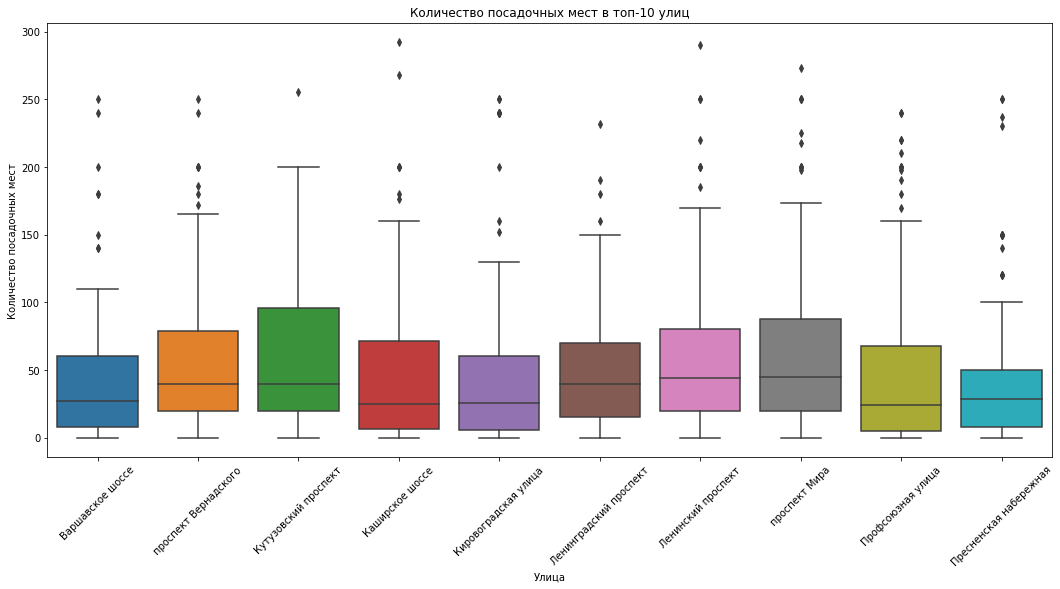

In [25]:
top_10_list = top_10_streets['street'].tolist()
top_10_seats = df.query('street in @top_10_list')[['street', 'number']]

plt.figure(figsize=(18, 8))
sns.boxplot(data=top_10_seats[top_10_seats['number'] < 300], x='street', y='number')
plt.xticks(rotation=45)
plt.xlabel('Улица')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест в топ-10 улиц')
plt.show();

Видим, что среднее количество посадочных мест в заведениях на топ-10 улиц - порядка 30-40 мест.

Построим гистограмму, чтобы посмотреть, как распределены заведения по количеству посадочных мест:

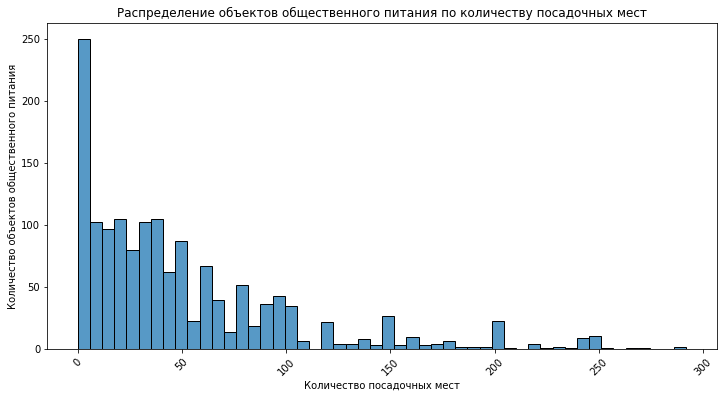

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(top_10_seats.query('number < 300')['number'], bins=50)
plt.xticks(rotation=45)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество объектов общественного питания')
plt.title('Распределение объектов общественного питания по количеству посадочных мест')
plt.show();

Видим, что среди прочих превалируют заведения без посадочных мест, которые мы выявили в самом начале: еда навынос, ларьки готовой едой, кулинарии и т.п. Таких заведений на наших топовых улицах порядка 250. Примерно одинаковое количество заведений имеют от 10 до 40 посадочных мест. Далее - чем больше посадочных мест, тем меньше таких заведений.

<a id="step3"></a>
## Общий вывод

Мы провели исследование рынка общественного питания в Москве и пришли к следующим выводам:

1. Практически 40% рынка общественного питания составляют кафе. Далее примерно на одном уровне по количеству идут столовые (17%), рестораны (15%) и ПБО (12,5%).


2. На рынке преобладают несетевые заведения. Несетевых заведений порядка 80% против 20% сетевых заведений.


3. Наибольшую долю среди всех сетевых заведений имеют кафе - 47%, далее ПБО - 27% и рестораны - 18%. Среди всех заведений сетевые объекты для типа ПБО составляют 41%, кулинарий - 29%, ресторанов - 24%, кафе - 23%. Общее количество кафе в городе достаточно большое и за счет этого они составляют значительную долю от всех сетевых заведений. Но при этом сетевой характер скорее присущ ПБО и отделам кулинарии в магазинах, а среди ресторанов и кафе он менее популярен, но все равно распространён.


4. Для сетевых баров, кафе и ПБО среднее количество посадочных мест составляет порядка 40-50 шт. В ресторанах в среднем порядка 100 посадочным мест. В целом для сетевых заведений скорее характерно большое количество заведений с небольшим числом посадочных мест.


5. На общем фоне количеством посадочных мест явно выделяются столовые - среднее количество посадочных мест составляет 130 шт., и рестораны - 97 шт. Это можно объяснить болшим количеством людей, посещающих подобные места в определенное время. В кафе, барах, а также буфетах в среднем порядка 40-50 мест. У ПБО в общем мест меньше, чем у сетевых ПБО - 21 шт. 


6. Топ-10 улиц по количеству расположенных на них заведений:

* проспект Мира - 204 
* Профсоюзная улица - 183
* Ленинградский проспект - 173
* Пресненская набережная - 167
* Варшавское шоссе - 165
* Ленинский проспект - 148
* проспект Вернадского - 132
* Кутузовский проспект - 114
* Каширское шоссе - 112
* Кировоградская улица - 110	

Данные улицы расположены в 37 районах Москвы. В среднем, каждая улица расположена в 1-2 округах и 4-5 районах Москвы (за исключением Пресненской набережной, которая расположена только в Пресненском районе).
Количество районов с всего 1 заведением - 102. Около 20 и более улиц с одним заведением находятся в центральных районах Москвы.


7. Среднее количество посадочных мест на топ-10 улиц - порядка 30-40 мест. Также на этих улицах расположено достаточно большое количество заведений без посадочных мест, т.е. с едой навынос.

Также хочется отметить, что необохимо проверить, каким образом собраны данные в изначальную таблицу. Глядя на то, каким образом заполнена таблица (разный формат текста в названиях заведений, по-разному заполненные адреса) можно предлопожить, что данные собирались вручную или из разных источников, что могло повлиять на полученные в результате исследования выводы. 

*Общие рекомендации:*

На основании всего вышеизложенного можно говорить о том, что наиболее популярным форматом для заведения общественного питания в Москве является кафе (этих заведений больше всего) с небольшим (порядка 30-40) количеством посадочных мест. В качестве расположения предпочтительно выбрать место из приведенного выше топ-10 улиц, которые расположены в наименьшем количестве районов (Пресненская набережная, Ленинградский проспект, Кутузовский проспект, Кировоградская улица, Каширское шоссе). Места наибольшей проходимости и ближе к центру вероятней всего будут привлекать наибольшее число гостей. Помимо кафе на этих улицах популярны объекты быстрого обслуживания с едой навынос.

Также достаточно привлекательными вариантами являются открытие столовой или ресторана с большим (порядка 100) количеством посадочных мест. Для таких заведений необходимо выбирать локации с большой проходимостью, либо же рядом с крупными офисными центрами и другими подобными точками скопления большого количества людей.